In [1]:
import torch
x = [[1,2], [3,4], [5,6], [7,8]]
y = [[3], [7], [11], [15]]

In [3]:
print(type(x))

<class 'list'>


In [8]:
x[1], y[1]

([3, 4], [7])

In [5]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [14]:
import torch.nn as nn

class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [15]:
mynet = MyNeuralNet().to(device)

In [19]:
mynet.hidden_to_output_layer.weight

Parameter containing:
tensor([[ 0.1063,  0.3208, -0.2138, -0.1818, -0.2999, -0.2980, -0.1252,  0.1348]],
       device='cuda:0', requires_grad=True)

In [22]:
for par in mynet.parameters():
    print(par)

Parameter containing:
tensor([[ 0.4539,  0.6968],
        [ 0.1949,  0.1185],
        [ 0.5382, -0.0198],
        [-0.6195, -0.5747],
        [ 0.4374,  0.0888],
        [-0.2722, -0.2638],
        [-0.0695,  0.6201],
        [ 0.2973, -0.5089]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([ 0.5826,  0.6875, -0.0336,  0.5044, -0.3002, -0.6258, -0.1268, -0.6030],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.1063,  0.3208, -0.2138, -0.1818, -0.2999, -0.2980, -0.1252,  0.1348]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([0.0478], device='cuda:0', requires_grad=True)


In [26]:
loss_func = nn.MSELoss()

In [27]:
_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)

tensor(103.4196, device='cuda:0', grad_fn=<MseLossBackward>)


In [28]:
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)

In [29]:
loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X), Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value)

Text(0, 0.5, 'loss value')

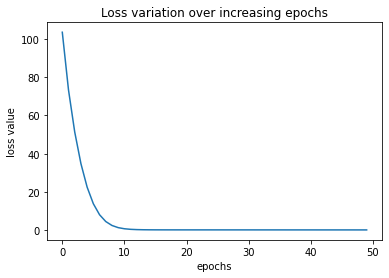

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')